# DATA UNDERSTANDING

### General Info

Sebuah perusahaan yang bergerak dalam bidang jual - beli makanan special / khas dari berbagai wilayah di dunia ingin mengetahui tentang gambaran kondisi umum pasar saat ini tentang bisnis yang mereka jalankan. Terdapat sebuah database yang menunjukkan detail dari proses transaksi tersebut yaitu "Northwind Database". Dari database tersebut, perusahaan ingin mendapatkan gambaran kondisi pasar saat ini, sehingga nantinya mereka dapat melakukan penerapan strategi bisnis yang tepat sasaran untuk memperoleh keuntungan bagi perusahaan.

### Database Information

Sumber Database : https://www.aspsnippets.com/Articles/Download-and-Install-Microsoft-Northwind-Sample-database-in-MySql.aspx

Database "Northwind Database.sql" terdiri dari 13 tabel, yaitu:

1. categories : menyimpan informasi tentang kategori dari jenis produk makanan
2. customercustomerdemo : null
3. customerdemographics : null
4. customers : menyimpan informasi tentang data lengkap pelanggan / customer
5. employees : menyimpan informasi tentang data pegawai yang berhubungan dengan penjualan kepada customer
6. employeeterritories : menyimpan informasi tentang data pembagian wilayah untuk masing - masing pegawai
7. orderdetails : menyimpan informasi tentang data penjualan untuk masing-masing order ID, seperti harga dan jumlah yang dibeli
8. orders : menyimpan informasi tentang data penjualan dan pengiriman produk, seperti tanggal pemesanan, tanggal pengiriman, serta informasi terkait pengiriman produk
9. products : menyimpan informasi tentang data produk, supplier yang menyediakan, harga produk hingga stock yang tersedia
10. region : menyimpan informasi tentang data region sesuai dengan region ID nya
11. shippers : menyimpan informasi tentang data ekspedisi pengiriman sesuai dengan shipper ID nya
12. suppliers : menyimpan informasi tentang data lengkap supplier / penyedia barang
13. territories : menyimpan informasi tentang data wilayah sesuai dengan territory ID nya

Setiap tabel yang tertera dapat terhubung, baik secara langsung maupun tidak langsung sehingga setiap informasi dari database ini akan saling berkaitan kecuali tabel customercustomerdemo dan customerdemographics yang berisikan nilai null. 

## DATABASE

### Connecting To Database

Pada bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database, database yang akan digunakan adalah database ``northwind``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.

In [1]:
# Import Modules

import pandas as pd
import numpy as np
import mysql.connector as sqlcon

In [2]:
# Connect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'empatbelas',
    database = 'northwind'
)

Selanjutnya dibuat sebuah fungsi untuk menuliskan ``query`` yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil ``query`` yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data.

In [3]:
# Query Function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    tabel1 = pd.DataFrame(result, columns=curs.column_names)
    return tabel1

## Data Detail dan Discount Produk

Data ini merupakan data utama yang nantinya akan dianalisa lebih lanjut. Data ini merupakan gabungan dari 5 tabel, yaitu tabel ```Suppliers```, ```Orders```, ```OrderDetails```, ```Products``` dan ```Shippers```. Masing-masing dari setiap tabel tersebut diambil beberapa kolom dan tidak diambil secara keseluruhan. Informasi penting yang diambil antara lain:

1. SupplierID dari tabel suppliers
2. CompanyName dari tabel suppliers
3. City dari tabel suppliers
4. Country dari tabel suppliers
5. ProductID dari tabel products
6. ProductName dari tabel products
7. UnitPrice dari tabel products
8. UnitsInStock dari tabel products
9. UnitsOnOrder dari tabel products
10. ReorderLevel dari tabel products
11. Discontinued dari tabel products
12. OrderID dari tabel orderdetails
13. UnitPrice dari tabel orderdetails --> Dirubah menjadi BuyPrice untuk membedakan dengan UnitPrice dari tabel products
14. Quantity dari tabel orderdetails --> Dirubah menjadi BuyQuantity untuk membedakan dengan UnitInStock dari tabel products
15. OrderDate dari tabel orders
16. ShippedDate dari tabel orders
17. ShipVia dari tabel orders
18. Freight dari tabel orders
19. ShipCity dari tabel orders
20. ShipCountry dari tabel orders
21. CompanyName dari tabel shippers --> Dirubah menjadi ShipperCompanyName untuk membedakan dengan CompanyName dari tabel suppliers

Selain dari tabel, ditambahkan sebuah kolom  yang dinamakan "Discount" yang merupakan selisih antara "UnitPrice" dari tabel ```products``` dan "UnitPrice" dari tabel ```orderdetails``` (BuyPrice).

Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame untuk kebutuhan analisis.

In [4]:
# Query Data 1

tabel1 = sql_table (
    '''
select s.SupplierID, s.CompanyName, s.City, s.Country, p.ProductID, p.ProductName, p.UnitPrice,
    p.UnitsInStock, p.UnitsOnOrder, p.ReorderLevel, p.Discontinued,
    od.OrderID, od.UnitPrice as BuyPrice, od.Quantity as BuyQuantity, o.OrderDate, o.ShippedDate,
    o.ShipVia, o.Freight, o.ShipCity, o.ShipCountry, sh.CompanyName as ShipperCompanyName,
    (p.UnitPrice - od.UnitPrice) Discount
from suppliers s
left join products p on s.SupplierID = p.SupplierID
left join orderdetails od on p.ProductID = od.ProductID
left join orders o on od.OrderID = o.OrderID
left join shippers sh on o.ShipVia = sh.ShipperID;
    '''
)
tabel1.head()

,SupplierID,CompanyName,City,Country,ProductID,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,...,BuyPrice,BuyQuantity,OrderDate,ShippedDate,ShipVia,Freight,ShipCity,ShipCountry,ShipperCompanyName,Discount
0,1,Exotic Liquids,London,UK,1,Chai,18.0000,39,0,10,...,14.4000,45,1996-08-20,1996-08-26,2,76.8300,Cunewalde,Germany,United Package,3.6000
1,1,Exotic Liquids,London,UK,1,Chai,18.0000,39,0,10,...,14.4000,18,1996-08-30,1996-09-05,2,147.2600,Albuquerque,USA,United Package,3.6000
2,1,Exotic Liquids,London,UK,1,Chai,18.0000,39,0,10,...,14.4000,20,1996-09-30,1996-10-10,1,12.6900,Portland,USA,Speedy Express,3.6000
3,1,Exotic Liquids,London,UK,1,Chai,18.0000,39,0,10,...,14.4000,15,1996-11-07,1996-11-15,2,0.7800,Stuttgart,Germany,United Package,3.6000
4,1,Exotic Liquids,London,UK,1,Chai,18.0000,39,0,10,...,14.4000,12,1996-11-14,1996-11-20,3,53.8000,Mxico D.F.,Mexico,Federal Shipping,3.6000


## Data Jenis Produk, Kuantitas, dan Total Harga Beli

Data selanjutnya menunjukkan gambaran umum yang dapat digunakan untuk menganalisa data dari sisi produk dan supplier. Data ini memuat jenis produk yang tersedia dari seluruh supplier mulai dari produk chai hingga original frankfurter grne soe, lengkap dengan banyaknya jenis produk, kuantitas, serta harga beli. Dari data ini dapat kita lihat beberapa poin sebagai berikut:
1. Perbandingan persediaan produk dari supplier serta jumlah produk yang telah terjual untuk melihat tingkat kepercayaan pelanggan atas kualitas suatu produk
2. Rata - rata harga produk terjual oleh pembeli serta selisih dengan harga satuan barang 
3. Rata - rata diskon atas produk yang terjual sehingga dapat diketahui produk apa yang memberikan diskon yang tinggi
4. Jumlah produk terjual dan total harga beli oleh customer

In [5]:
# Query Data 2 (Aggregating)

tabel2 = sql_table(
    '''
select 
    s.CompanyName Nama_Supplier,
    p.ProductName Jenis_Produk,
    p.UnitsInStock Stock_Produk,
    p.UnitPrice Harga_Produk,
    count(od.OrderID) Banyak_Penjualan, 
    sum(od.Quantity) Jumlah_Terjual, 
    sum(od.UnitPrice) Jumlah_Harga_Beli,
    avg(od.UnitPrice) RataRata_Harga_Beli,
    (avg(od.UnitPrice) - p.UnitPrice) Diskon
from suppliers s
left join products p on s.SupplierID = p.SupplierID
left join orderdetails od on p.ProductID = od.ProductID
group by Jenis_Produk
order by Diskon;
    '''
)

tabel2.head()

,Nama_Supplier,Jenis_Produk,Stock_Produk,Harga_Produk,Banyak_Penjualan,Jumlah_Terjual,Jumlah_Harga_Beli,RataRata_Harga_Beli,Diskon
0,Aux joyeux ecclsiastiques,Cte de Blaye,17,263.5000,24,623,5902.4000,245.93333333,-17.56666667
1,Plutzer Lebensmittelgromrkte AG,Thringer Rostbratwurst,0,123.7900,32,746,3713.3800,116.04312500,-7.74687500
2,"Specialty Biscuits, Ltd.",Sir Rodney's Marmalade,40,81.0000,16,313,1215.0000,75.93750000,-5.06250000
3,Tokyo Traders,Mishi Kobe Niku,29,97.0000,5,95,465.6000,93.12000000,-3.88000000
4,Gai pturage,Raclette Courdavault,79,55.0000,54,1496,2761.0000,51.12962963,-3.87037037


### Data Penjualan dari Supplier Diatas Rata-rata

Data selanjutnya menunjukkan gambaran yang dapat digunakan untuk menganalisa data dari penjualan produk dari supplier yang diatas rata-rata penjualan produk keseluruhan. Data ini dapat digunakan untuk mengetahui produk apa saja yang mengalami penjualan diatas rata-rata dan supplier apa saja yang dapat menjual produknya diatas rata-rata.

In [6]:
# Query Data 3 (Using CTE)

tabel3 = sql_table(
    '''
with Avg_BuyQuantity as (
    select avg(Quantity) RataRata_Terjual
    from orderdetails)
select 
    s.CompanyName Nama_Supplier,
    p.ProductName Jenis_Produk,
    sum(od.Quantity) Jumlah_Produk_Terjual,
    (select RataRata_Terjual from Avg_BuyQuantity) RataRata_Produk_Terjual
from suppliers s
left join products p on s.SupplierID = p.SupplierID
left join orderdetails od on p.ProductID = od.ProductID
group by Jenis_Produk
having Jumlah_Produk_Terjual >= RataRata_Produk_Terjual
order by Jumlah_Produk_Terjual desc;
    '''
)

tabel3

,Nama_Supplier,Jenis_Produk,Jumlah_Produk_Terjual,RataRata_Produk_Terjual
0,Gai pturage,Camembert Pierrot,1577,23.8130
1,Gai pturage,Raclette Courdavault,1496,23.8130
2,Formaggi Fortini s.r.l.,Gorgonzola Telino,1397,23.8130
3,Pasta Buttini s.r.l.,Gnocchi di nonna Alice,1263,23.8130
4,"Pavlova, Ltd.",Pavlova,1158,23.8130
...,...,...,...,...
72,Bigfoot Breweries,Laughing Lumberjack Lager,184,23.8130
73,Zaanse Snoepfabriek,Chocolade,138,23.8130
74,Svensk Sjfda AB,Gravad lax,125,23.8130
75,Mayumi's,Genen Shouyu,122,23.8130


## DATA MANIPULATION

Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada ```tabel1``` yang menggunakan query data 1. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah sebuah dataset yang bersih yang dapat dianalisis lebih lanjut.

### Handling Data Anomalies

In [7]:
# Check Info Tabel1

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SupplierID          2155 non-null   int64         
 1   CompanyName         2155 non-null   object        
 2   City                2155 non-null   object        
 3   Country             2155 non-null   object        
 4   ProductID           2155 non-null   int64         
 5   ProductName         2155 non-null   object        
 6   UnitPrice           2155 non-null   object        
 7   UnitsInStock        2155 non-null   int64         
 8   UnitsOnOrder        2155 non-null   int64         
 9   ReorderLevel        2155 non-null   int64         
 10  Discontinued        2155 non-null   int64         
 11  OrderID             2155 non-null   int64         
 12  BuyPrice            2155 non-null   object        
 13  BuyQuantity         2155 non-null   int64       

## Gambaran Data sesuai General Info

Sesuai yang ditampilkan dalam general info, terlihat bahwa secara keseluruhan terdapat 2155 baris data dengan total 20 kolom. Setiap kolomnya memiliki tipe data yang berbeda. Ada object, integer, dan datetime. Berikut adalah poin - poin yang didapat dari general info yaitu:

1. Terdapat kolom / feature ```ShippedDate``` yang memiliki data tidak lengkap, hal tersebut ditunjukkan dari non-null values yang bernilai 2082 sedangkan jumlah keseluruhan data bernilai 2155.

2. Terdapat 4 kolom yaitu ```UnitPrice```, ```BuyPrice```, ```Freight```, ```Discount``` yang seharusnya memiliki tipe data numerik (dibuktikan pada preview data di bagian sebelumnya), namun yang terbaca pada general info yaitu tipe data object. Artinya, keempat feature ini tidak dianggap memiliki komponen data yang numerik. Tentu saja hal tersebut harus ditanggulangi, mengingat ke depannya data yang bersifat numerik ini akan digunakan.

**Kesimpulan dari kedua poin diatas yaitu terdapat missing value pada satu feature dan terdapat empat feature yang memiliki tipe data yang tidak sesuai untuk pengolahan data selanjutnya, dimana kedua hal tersebut harus dilakukan penyesuaian seperti mengatasi missing value dan mengubah tipe data sesuai dengan fungsionalitasnya.**

### Pembuktian Missing Value

In [8]:
# Check Missing Value

tabel1.isnull().sum()

SupplierID             0
CompanyName            0
City                   0
Country                0
ProductID              0
ProductName            0
UnitPrice              0
UnitsInStock           0
UnitsOnOrder           0
ReorderLevel           0
Discontinued           0
OrderID                0
BuyPrice               0
BuyQuantity            0
OrderDate              0
ShippedDate           73
ShipVia                0
Freight                0
ShipCity               0
ShipCountry            0
ShipperCompanyName     0
Discount               0
dtype: int64

Dari data yang ditampilkan diatas, pada feature ```ShippedDate``` terdapat missing value sebanyak 73. Missing value tersebut harus diatasi terlebih dahulu agar tidak mengganggu proses analisa namun jangan sampai juga jika data tersebut hilang akan berdampak buruk pada interpretasi data. 

Jika dilihat dari jumlahnya yaitu sebanyak 73 dari total 2155 jika dipresentasekan menjadi 3,4% maka dengan nilai yang tidak begitu signifikan dan tidak akan mengurangi informasi secara signifikan, cara mengatasi data tersebut dapat dilakukan dengan cara menghilangkan baris yang terdapat missing value tersebut.

### Handling Missing Value

Pada bagian handling missing value akan dilakukan penghapusan atas data missing value dengan cara drop feature pada ```ShippedDate``` yang mengandung missing value.

In [9]:
# Remove Missing Value

tabel1.dropna(inplace = True)

### Recheck Missing Value Information

In [10]:
# Recheck Info

tabel1.isnull().sum()

SupplierID            0
CompanyName           0
City                  0
Country               0
ProductID             0
ProductName           0
UnitPrice             0
UnitsInStock          0
UnitsOnOrder          0
ReorderLevel          0
Discontinued          0
OrderID               0
BuyPrice              0
BuyQuantity           0
OrderDate             0
ShippedDate           0
ShipVia               0
Freight               0
ShipCity              0
ShipCountry           0
ShipperCompanyName    0
Discount              0
dtype: int64

Setelah melakukan proses drop missing value, dilakukan pengecekan terhadap data yang dimiliki untuk memastikan apakah sudah tidak ada missing value lagi. Jika melihat pada tampilan diatas, sudah tidak terdapat lagi missing value sama sekali. Untuk masing-masing feature sudah memiliki 0 missing value yang berarti masalah missing value sudah teratasi.

### Handling False Data Type

### Pengecekan Fungsionalitas Feature pada Data

Sebelum melakukan perubahan tipe data yang salah, dalam bagian ini akan dilakukan pengecekan atas fungsionalitas dari masing - masing feature sebelum digunakan untuk proses analisa data. Hal ini bertujuan agar tidak terjadi miss interpretasi data. Proses pengecekan dilakukan dengan cara melihat isi dari masing - masing feature melalui fungsi ```.head()```.

In [11]:
tabel1.head()

,SupplierID,CompanyName,City,Country,ProductID,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,...,BuyPrice,BuyQuantity,OrderDate,ShippedDate,ShipVia,Freight,ShipCity,ShipCountry,ShipperCompanyName,Discount
0,1,Exotic Liquids,London,UK,1,Chai,18.0000,39,0,10,...,14.4000,45,1996-08-20,1996-08-26,2,76.8300,Cunewalde,Germany,United Package,3.6000
1,1,Exotic Liquids,London,UK,1,Chai,18.0000,39,0,10,...,14.4000,18,1996-08-30,1996-09-05,2,147.2600,Albuquerque,USA,United Package,3.6000
2,1,Exotic Liquids,London,UK,1,Chai,18.0000,39,0,10,...,14.4000,20,1996-09-30,1996-10-10,1,12.6900,Portland,USA,Speedy Express,3.6000
3,1,Exotic Liquids,London,UK,1,Chai,18.0000,39,0,10,...,14.4000,15,1996-11-07,1996-11-15,2,0.7800,Stuttgart,Germany,United Package,3.6000
4,1,Exotic Liquids,London,UK,1,Chai,18.0000,39,0,10,...,14.4000,12,1996-11-14,1996-11-20,3,53.8000,Mxico D.F.,Mexico,Federal Shipping,3.6000


Dalam tampilan diatas dapat dilihat bahwa data dari feature ```UnitPrice```, ```BuyPrice```, ```Freight``` dan ```Discount``` memiliki kesalahan dalam penulisan bilangan rupiah, sebagai contoh pada baris pertama ```UnitPrice``` memiliki nilai 18.0000 yang seharusnya ditulis 180.000 yang berarti 180 Ribu. Oleh karena itu harus dilakukan perubahan format penulisan data agar saat diubah menjadi data numerik dapat terbaca dan tidak ada data yang hilang.

### Mengubah Format Penulisan Data

In [12]:
# Change Data Format

tabel1['UnitPrice'] = tabel1['UnitPrice'].apply(str).str.replace('.', '',regex=True)
tabel1['BuyPrice'] = tabel1['BuyPrice'].apply(str).str.replace('.', '',regex=True)
tabel1['Freight'] = tabel1['Freight'].apply(str).str.replace('.', '',regex=True)
tabel1['Discount'] = tabel1['Discount'].apply(str).str.replace('.', '',regex=True)
tabel1

,SupplierID,CompanyName,City,Country,ProductID,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,...,BuyPrice,BuyQuantity,OrderDate,ShippedDate,ShipVia,Freight,ShipCity,ShipCountry,ShipperCompanyName,Discount
0,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,144000,45,1996-08-20,1996-08-26,2,768300,Cunewalde,Germany,United Package,36000
1,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,144000,18,1996-08-30,1996-09-05,2,1472600,Albuquerque,USA,United Package,36000
2,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,144000,20,1996-09-30,1996-10-10,1,126900,Portland,USA,Speedy Express,36000
3,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,144000,15,1996-11-07,1996-11-15,2,07800,Stuttgart,Germany,United Package,36000
4,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,144000,12,1996-11-14,1996-11-20,3,538000,Mxico D.F.,Mexico,Federal Shipping,36000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,29,Forts d'rables,Ste-Hyacinthe,Canada,62,Tarte au sucre,493000,17,0,0,...,493000,60,1998-03-13,1998-03-17,3,744400,Tsawassen,Canada,Federal Shipping,00000
2151,29,Forts d'rables,Ste-Hyacinthe,Canada,62,Tarte au sucre,493000,17,0,0,...,493000,12,1998-03-20,1998-04-08,1,271900,Bern,Switzerland,Speedy Express,00000
2152,29,Forts d'rables,Ste-Hyacinthe,Canada,62,Tarte au sucre,493000,17,0,0,...,493000,40,1998-03-31,1998-04-10,2,611400,Albuquerque,USA,United Package,00000
2153,29,Forts d'rables,Ste-Hyacinthe,Canada,62,Tarte au sucre,493000,17,0,0,...,493000,21,1998-04-16,1998-04-20,1,525200,Tsawassen,Canada,Speedy Express,00000


Dalam tampilan diatas dapat dilihat bahwa data dari feature ```UnitPrice```, ```BuyPrice```, ```Freight``` dan ```Discount``` telah berubah sesuai dengan format penulisan bilangan rupiah sehingga jika dilakukan perubahan tipe data tidak akan ada data yang hilang.

### Mengubah Tipe Data Yang Salah

Pada bagian handling anomalies yang kedua akan dilakukan perubahan tipe data untuk ```UnitPrice```, ```BuyPrice```, ```Freight```, ```Discount``` agar yang tadinya memiliki tipe data object menjadi tipe data numerik agar fungsionalitas datanya dapat digunakan sebagai mestinya.

In [13]:
# Change Spesific Column To Numeric Format

tabel1['UnitPrice'] = pd.to_numeric(tabel1['UnitPrice'])
tabel1['BuyPrice'] = pd.to_numeric(tabel1['BuyPrice'])
tabel1['Freight'] = pd.to_numeric(tabel1['Freight'])
tabel1['Discount'] = pd.to_numeric(tabel1['Discount'])

### Recheck Data Information

In [14]:
# Recheck Info

tabel1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2082 entries, 0 to 2154
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   SupplierID          2082 non-null   int64         
 1   CompanyName         2082 non-null   object        
 2   City                2082 non-null   object        
 3   Country             2082 non-null   object        
 4   ProductID           2082 non-null   int64         
 5   ProductName         2082 non-null   object        
 6   UnitPrice           2082 non-null   int64         
 7   UnitsInStock        2082 non-null   int64         
 8   UnitsOnOrder        2082 non-null   int64         
 9   ReorderLevel        2082 non-null   int64         
 10  Discontinued        2082 non-null   int64         
 11  OrderID             2082 non-null   int64         
 12  BuyPrice            2082 non-null   int64         
 13  BuyQuantity         2082 non-null   int64       

Bagian sebelumnya, 4 features yaitu ```UnitPrice```, ```BuyPrice```, ```Freight```, ```Discount``` yang memiliki tipe data yang salah sudah diubah ke dalam tipe data yang seharusnya. Untuk memastikannya, output di atas merupakan informasi umum yang kembali diperlihatkan untuk memastikan tipe data yang sudah diubah tersebut.
1. ```UnitPrice``` yang semula bertipe object diubah menjadi numerik
2. ```BuyPrice``` yang semula bertipe object diubah menjadi numerik
3. ```Freight``` yang semula bertipe object diubah menjadi numerik
4. ```Discount``` yang semula bertipe object diubah menjadi numerik

### Data Duplicate

In [15]:
# Check Duplicate

tabel1[tabel1.duplicated()]

,SupplierID,CompanyName,City,Country,ProductID,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,...,BuyPrice,BuyQuantity,OrderDate,ShippedDate,ShipVia,Freight,ShipCity,ShipCountry,ShipperCompanyName,Discount


Sesuai dengan tampilan diatas didapatkan bahwa pada data tidak terdapat data yang duplikat sehingga tidak harus dilakukan penyesuaian atas data duplikat.

### Penambahan Feature "ProcessingDay"

Berdasarkan feature yang ada terdapat feature ```OrderDate``` yang merupakan tanggal pemesanan dan ```ShippedDate``` yang merupakan tanggal pengiriman. Dari kedua data tersebut bisa didapatkan kolom baru untuk mengetahui tingkat respon supplier dalam pemroses pesanan pelanggan yang didapatkan dari selisih antara ```ShippedDate``` dengan ```OrderDate```.

In [16]:
# Add New Column (Processing Day)

tabel1['ProcessingDay'] = tabel1['ShippedDate'] - tabel1['OrderDate']
tabel1.head()

,SupplierID,CompanyName,City,Country,ProductID,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,...,BuyQuantity,OrderDate,ShippedDate,ShipVia,Freight,ShipCity,ShipCountry,ShipperCompanyName,Discount,ProcessingDay
0,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,45,1996-08-20,1996-08-26,2,768300,Cunewalde,Germany,United Package,36000,6 days
1,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,18,1996-08-30,1996-09-05,2,1472600,Albuquerque,USA,United Package,36000,6 days
2,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,20,1996-09-30,1996-10-10,1,126900,Portland,USA,Speedy Express,36000,10 days
3,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,15,1996-11-07,1996-11-15,2,7800,Stuttgart,Germany,United Package,36000,8 days
4,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,12,1996-11-14,1996-11-20,3,538000,Mxico D.F.,Mexico,Federal Shipping,36000,6 days


### Check Unique Value "ProcessingDay"

Selanjutnya dilakukan pengecekan unique value dari kolom baru ```ProcessingDay``` yang telah dibuat. Bagian ini bertujuan untuk melihat apakah ada data yang tergolong dalam anomali atau tidak.

In [17]:
# Check Data Anomalies in Date Time Fomrat

tabel1['ProcessingDay'].value_counts()

7 days     271
6 days     241
3 days     187
9 days     184
5 days     177
4 days     176
8 days     174
2 days     149
10 days    129
12 days     45
1 days      43
11 days     34
19 days     23
21 days     20
29 days     19
18 days     19
13 days     17
32 days     15
23 days     15
15 days     14
34 days     13
25 days     13
20 days     13
14 days     12
35 days     12
22 days     11
30 days     11
17 days     11
24 days     11
28 days      8
26 days      5
27 days      4
31 days      3
37 days      2
16 days      1
Name: ProcessingDay, dtype: int64

In [18]:
tabel1['ProcessingDay'] = tabel1['ProcessingDay'].dt.days
tabel1

,SupplierID,CompanyName,City,Country,ProductID,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,...,BuyQuantity,OrderDate,ShippedDate,ShipVia,Freight,ShipCity,ShipCountry,ShipperCompanyName,Discount,ProcessingDay
0,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,45,1996-08-20,1996-08-26,2,768300,Cunewalde,Germany,United Package,36000,6
1,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,18,1996-08-30,1996-09-05,2,1472600,Albuquerque,USA,United Package,36000,6
2,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,20,1996-09-30,1996-10-10,1,126900,Portland,USA,Speedy Express,36000,10
3,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,15,1996-11-07,1996-11-15,2,7800,Stuttgart,Germany,United Package,36000,8
4,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,12,1996-11-14,1996-11-20,3,538000,Mxico D.F.,Mexico,Federal Shipping,36000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,29,Forts d'rables,Ste-Hyacinthe,Canada,62,Tarte au sucre,493000,17,0,0,...,60,1998-03-13,1998-03-17,3,744400,Tsawassen,Canada,Federal Shipping,0,4
2151,29,Forts d'rables,Ste-Hyacinthe,Canada,62,Tarte au sucre,493000,17,0,0,...,12,1998-03-20,1998-04-08,1,271900,Bern,Switzerland,Speedy Express,0,19
2152,29,Forts d'rables,Ste-Hyacinthe,Canada,62,Tarte au sucre,493000,17,0,0,...,40,1998-03-31,1998-04-10,2,611400,Albuquerque,USA,United Package,0,10
2153,29,Forts d'rables,Ste-Hyacinthe,Canada,62,Tarte au sucre,493000,17,0,0,...,21,1998-04-16,1998-04-20,1,525200,Tsawassen,Canada,Speedy Express,0,4


### Anomali Pada ProcessingDay

Melihat dari tampilan diatas tidak ditemukan anomali pada data seperti data yang bersifat negatif atau data yang nilainya terlampau jauh berbeda dengan yang lain.

### Membuat Feature "TotalBuyPrice"

In [19]:
# Adding New Column With Lambda Function

tabel1['TotalBuyPrice'] = tabel1[['BuyPrice', 'BuyQuantity']].apply(lambda x:(x['BuyPrice'] * x['BuyQuantity']), axis = 1)
tabel1.head()

,SupplierID,CompanyName,City,Country,ProductID,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,...,OrderDate,ShippedDate,ShipVia,Freight,ShipCity,ShipCountry,ShipperCompanyName,Discount,ProcessingDay,TotalBuyPrice
0,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,1996-08-20,1996-08-26,2,768300,Cunewalde,Germany,United Package,36000,6,6480000
1,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,1996-08-30,1996-09-05,2,1472600,Albuquerque,USA,United Package,36000,6,2592000
2,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,1996-09-30,1996-10-10,1,126900,Portland,USA,Speedy Express,36000,10,2880000
3,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,1996-11-07,1996-11-15,2,7800,Stuttgart,Germany,United Package,36000,8,2160000
4,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,1996-11-14,1996-11-20,3,538000,Mxico D.F.,Mexico,Federal Shipping,36000,6,1728000


### Preview Cleaned Data

Setelah semua data anomali sudah diatasi, artinya data yang dimiliki sudah bersih. Di bawah ini adalah sample data yang dianggap sudah bersih setelah melewati proses-proses data cleaning.

In [20]:
# Clean Data

tabel1.sample(20)

,SupplierID,CompanyName,City,Country,ProductID,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,...,OrderDate,ShippedDate,ShipVia,Freight,ShipCity,ShipCountry,ShipperCompanyName,Discount,ProcessingDay,TotalBuyPrice
554,8,"Specialty Biscuits, Ltd.",Manchester,UK,19,Teatime Chocolate Biscuits,92000,25,0,5,...,1996-09-06,1996-09-13,2,297600,Rio de Janeiro,Brazil,United Package,19000,7,1095000
1553,20,Leka Trading,Singapore,Singapore,43,Ipoh Coffee,460000,17,10,25,...,1998-03-27,1998-04-08,1,140100,Tsawassen,Canada,Speedy Express,0,12,4140000
439,7,"Pavlova, Ltd.",Melbourne,Australia,17,Alice Mutton,390000,0,0,0,...,1996-11-05,1996-11-08,3,1420800,Albuquerque,USA,Federal Shipping,78000,3,11232000
1613,21,Lyngbysild,Lyngby,Denmark,46,Spegesild,120000,95,0,0,...,1997-11-17,1997-11-21,2,237200,Colchester,UK,United Package,0,4,3360000
1326,17,Svensk Sjfda AB,Stockholm,Sweden,36,Inlagd Sill,190000,112,0,20,...,1997-10-27,1997-10-29,3,1708800,Brandenburg,Germany,Federal Shipping,0,2,7600000
1929,26,Pasta Buttini s.r.l.,Salerno,Italy,56,Gnocchi di nonna Alice,380000,21,10,30,...,1998-01-20,1998-01-29,2,4243000,Charleroi,Belgium,United Package,0,9,11400000
1242,16,Bigfoot Breweries,Bend,USA,34,Sasquatch Ale,140000,111,0,15,...,1996-08-22,1996-08-28,3,127600,Rio de Janeiro,Brazil,Federal Shipping,28000,6,2240000
1493,19,New England Seafood Cannery,Boston,USA,41,Jack's New England Clam Chowder,96500,85,0,10,...,1998-04-03,1998-04-10,2,963500,Kln,Germany,United Package,0,7,1930000
1038,14,Formaggi Fortini s.r.l.,Ravenna,Italy,31,Gorgonzola Telino,125000,0,70,20,...,1996-10-30,1996-11-04,2,548300,Mnchen,Germany,United Package,25000,5,5600000
1995,28,Gai pturage,Annecy,France,59,Raclette Courdavault,550000,79,0,0,...,1997-03-27,1997-04-02,2,49300,Mnchen,Germany,United Package,110000,6,13200000


### General Info Cleaned Data

In [21]:
# Check Some Info

listItem = []
for col in tabel1.columns :
    listItem.append([col, len(tabel1),tabel1[col].isna().sum(), round((tabel1[col].isna().sum()/len(tabel1[col])) * 100,2),
                    tabel1[col].nunique(), list(tabel1[col].drop_duplicates().sample(2).values)])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Data Count,Missing Value,Missing Value Percentage,Number of Unique,Unique Sample
0,SupplierID,2082,0,0.0,29,"[8, 22]"
1,CompanyName,2082,0,0.0,29,"[Aux joyeux ecclsiastiques, Grandma Kelly's Ho..."
2,City,2082,0,0.0,29,"[Frankfurt, Oviedo]"
3,Country,2082,0,0.0,17,"[Denmark, Singapore]"
4,ProductID,2082,0,0.0,77,"[67, 61]"
5,ProductName,2082,0,0.0,77,"[Northwoods Cranberry Sauce, Gustaf's Knckebrd]"
6,UnitPrice,2082,0,0.0,62,"[232500, 332500]"
7,UnitsInStock,2082,0,0.0,51,"[14, 0]"
8,UnitsOnOrder,2082,0,0.0,10,"[20, 80]"
9,ReorderLevel,2082,0,0.0,7,"[30, 25]"


### Data Outlier

In [22]:
# Outlier Check With Function

Q1_amount = tabel1['Discount'].describe()['25%']
Q3_amount = tabel1['Discount'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = tabel1[(tabel1['Discount'] < Q1_amount - (1.5 * iqr)) | (tabel1['Discount']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = tabel1[(tabel1['Discount'] > Q1_amount - (1.5 * iqr)) & (tabel1['Discount']< Q3_amount + (1.5 * iqr)) ].index
tabel1.loc[outlier_index]

,SupplierID,CompanyName,City,Country,ProductID,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,...,OrderDate,ShippedDate,ShipVia,Freight,ShipCity,ShipCountry,ShipperCompanyName,Discount,ProcessingDay,TotalBuyPrice
205,3,Grandma Kelly's Homestead,Ann Arbor,USA,8,Northwoods Cranberry Sauce,400000,6,0,0,...,1996-11-01,1996-11-05,2,232900,Seattle,USA,United Package,80000,4,22400000
206,3,Grandma Kelly's Homestead,Ann Arbor,USA,8,Northwoods Cranberry Sauce,400000,6,0,0,...,1996-11-04,1996-11-11,2,2490600,Cunewalde,Germany,United Package,80000,7,22400000
218,4,Tokyo Traders,Tokyo,Japan,9,Mishi Kobe Niku,970000,29,0,0,...,1997-01-21,1997-01-27,1,441200,Resende,Brazil,Speedy Express,194000,6,15520000
269,5,Cooperativa de Quesos 'Las Cabras',Oviedo,Spain,11,Queso Cabrales,210000,22,30,30,...,1996-07-04,1996-07-16,3,323800,Reims,France,Federal Shipping,70000,12,1680000
307,5,Cooperativa de Quesos 'Las Cabras',Oviedo,Spain,12,Queso Manchego La Pastora,380000,86,0,0,...,1996-07-26,1996-07-31,3,257300,Oulu,Finland,Federal Shipping,76000,5,3648000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,29,Forts d'rables,Ste-Hyacinthe,Canada,62,Tarte au sucre,493000,17,0,0,...,1996-12-20,1996-12-24,2,474200,Tsawassen,Canada,United Package,99000,4,7880000
2117,29,Forts d'rables,Ste-Hyacinthe,Canada,62,Tarte au sucre,493000,17,0,0,...,1996-12-25,1997-01-03,3,303400,Elgin,USA,Federal Shipping,99000,9,3940000
2118,29,Forts d'rables,Ste-Hyacinthe,Canada,62,Tarte au sucre,493000,17,0,0,...,1997-01-08,1997-01-14,1,112600,Lille,France,Speedy Express,99000,6,13790000
2119,29,Forts d'rables,Ste-Hyacinthe,Canada,62,Tarte au sucre,493000,17,0,0,...,1997-01-14,1997-01-16,2,956600,Toulouse,France,United Package,99000,2,15760000


In [25]:
# Import Library

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Discount'>

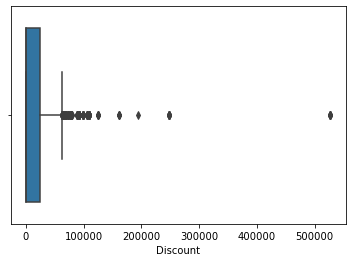

In [26]:
# View Data Outlier Use Boxplot

sns.boxplot(tabel1['Discount'])

Sesuai tampilan tabel dan grafik diatas didapatkan adanya data outlier sebanyak 214 baris data outlier dari jumlah data sebanyak 2082 atau secara presentase senilai 10,3%. Dikarenakan secara presentase cukup signifikan jika data outlier tersebut dihilangkan, maka data outlier tersebut tetap digunakan dalam data tabel1.

## DATA VISUALIZATION & STATISTICS

Pada tahapan awal data visualization kali ini, tools yang akan digunakan yaitu grafik yang menggunakan python dengan bantuan library ```matplotlib``` dan ```seaborn```. Tools tersebut dipilih agar seluruh proses dalam project ini terintegrasi dalam satu framework yang sama yaitu python dan jupyterlab. Dengan begitu akan memudahkan proses data analysis maupun siapapun yang membaca keseluruhan alur dari proses data preparation hingga data anlysisnya.

### Waktu Respon Pemesanan Oleh Supplier

In [27]:
# Groupping and Aggregating

tabelInfo = tabel1.groupby('CompanyName')['ProcessingDay'].describe().reset_index()
tabelInfo.sort_values('count', ascending=False)

,CompanyName,count,mean,std,min,25%,50%,75%,max
23,Plutzer Lebensmittelgromrkte AG,171.0,9.070175,7.372109,1.0,4.00,7.0,10.00,35.0
22,"Pavlova, Ltd.",158.0,8.265823,6.830447,1.0,4.00,6.5,9.00,35.0
25,"Specialty Biscuits, Ltd.",122.0,8.524590,7.231946,1.0,5.00,7.0,9.00,37.0
5,Formaggi Fortini s.r.l.,102.0,7.647059,6.550107,1.0,4.00,6.0,9.00,34.0
19,Norske Meierier,102.0,8.941176,7.241005,2.0,4.25,7.0,9.00,35.0
8,Gai pturage,101.0,7.950495,7.119517,2.0,4.00,6.0,9.00,35.0
7,"G'day, Mate",95.0,7.884211,6.629822,1.0,4.50,6.0,9.00,35.0
4,Exotic Liquids,88.0,7.636364,4.922811,2.0,5.00,7.0,9.00,30.0
16,New England Seafood Cannery,86.0,8.593023,6.763880,2.0,4.00,7.0,9.00,30.0
12,Leka Trading,81.0,9.135802,7.412410,1.0,5.00,7.0,10.00,37.0


Pada bagian ini kita ingin melihat supplier apa saja yang banyak memberikan diskon dengan intensitas yang sangat banyak. Hal tersebut dapat kita lihat dengan melihat hubungan antara feature ```ProcessingDay``` dan ```SupplierID```. 

Pada tampilan data diatas didapatkan bahwa supplier yang memiliki waktu respon pemesanan lebih cepat belum tentu memiliki jumlah pemesanan yang paling banyak. Dan sebaliknya supplier yang memiliki waktu respon paling lama belum tentu memiliki jumlah pemesanan yang paling sedikit. 

Dari kedua hal tersebut artinya kualitas dari produk tetap menjadi hal yang paling utama yang dibutuhkan pelanggan, sedangkan waktu respon supplier merupakan bagian pendukung dari apa yang dibutuhkan pelanggan. Hal tersebut terlihat dari posisi 5 teratas untuk jumlah order terbanyak dimiliki oleh supplier yang secara waktu respon pemesanan yang tidak terlalu cepat malah tergolong agak lambat dibanding yang beberapa supplier lain namun tidak yang paling lama dari keseluruhan supplier.

### Supplier dengan Pendapatan Tertinggi

In [29]:
# Call DataFrame

tabel1.head()

,SupplierID,CompanyName,City,Country,ProductID,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,...,OrderDate,ShippedDate,ShipVia,Freight,ShipCity,ShipCountry,ShipperCompanyName,Discount,ProcessingDay,TotalBuyPrice
0,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,1996-08-20,1996-08-26,2,768300,Cunewalde,Germany,United Package,36000,6,6480000
1,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,1996-08-30,1996-09-05,2,1472600,Albuquerque,USA,United Package,36000,6,2592000
2,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,1996-09-30,1996-10-10,1,126900,Portland,USA,Speedy Express,36000,10,2880000
3,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,1996-11-07,1996-11-15,2,7800,Stuttgart,Germany,United Package,36000,8,2160000
4,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,1996-11-14,1996-11-20,3,538000,Mxico D.F.,Mexico,Federal Shipping,36000,6,1728000


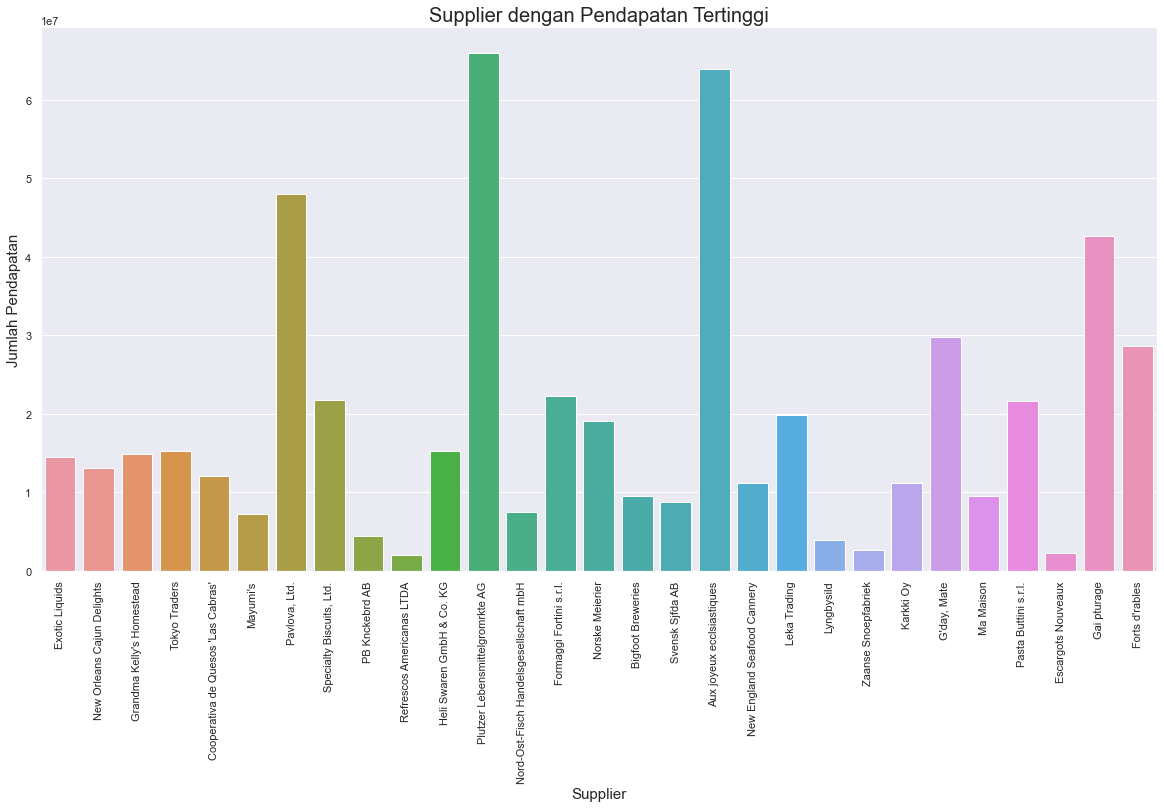

In [30]:
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
sns.barplot(data=tabel1, x="CompanyName", y="BuyPrice", estimator=sum, ci=None)
plt.xlabel('Supplier', size = 15)
plt.ylabel('Jumlah Pendapatan', size = 15)
plt.title('Supplier dengan Pendapatan Tertinggi', size = 20)
plt.xticks(rotation=90)
plt.show()

Dari grafik diatas, didapatkan jumlah pendapatan bruto dari produk-produk yang terjual dari masing-masing supplier. Pendapatan bruto yang dimaksud didapatkan dari jumlah dari total penjualan produk (sum of ```BuyPrice```). Didapatkan top 10 supplier dengan pendapatan tertinggi yaitu:
1. Plutzer Lebensmittelgromrkte AG
2. Aux joyeux ecclsiastiques
3. Pavlova, Ltd.
4. Gai pturage
5. G'day, Mate
6. Forts d'rables
7. Formaggi Fortini s.r.l.
8. Specialty Biscuits, Ltd.
9. Pasta Buttini s.r.l.
10. Leka Trading

### Supplier dengan Pemesanan Tertinggi

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


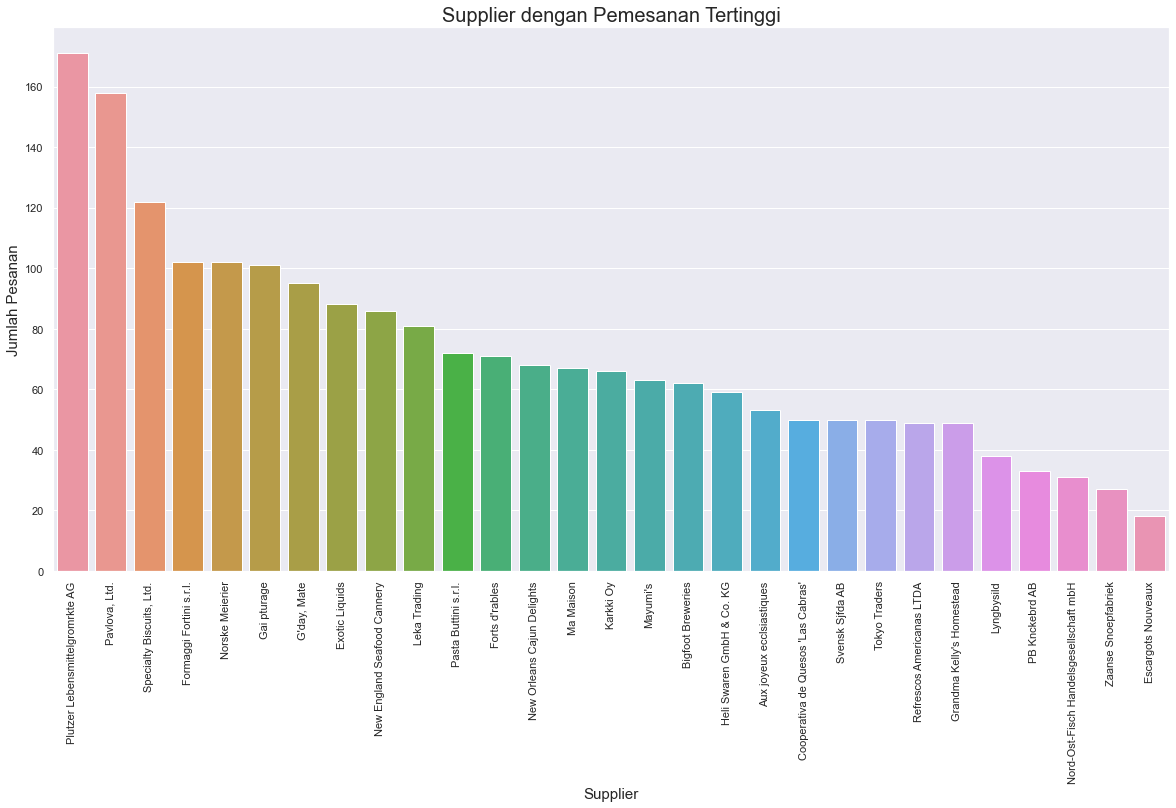

In [31]:
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
sns.countplot(tabel1['CompanyName'],order = tabel1['CompanyName'].value_counts().index)
plt.xlabel('Supplier', size = 15)
plt.ylabel('Jumlah Pesanan', size = 15)
plt.title('Supplier dengan Pemesanan Tertinggi', size = 20)
plt.xticks(rotation=90)
plt.show()

Dari grafik diatas, didapatkan jumlah pesanan dari produk-produk yang terjual dari masing-masing supplier. Jumlah pesanan produk yang dimaksud didapatkan dari jumlah dari total pesanan dari pelanggan (count of ```CompanyName``` sesuai dengan ```OrderID```). Didapatkan top 10 supplier dengan jumlah pemesanan tertinggi yaitu:
1. Plutzer Lebensmittelgromrkte AG
2. Pavlova, Ltd.
3. Specialty Biscuits, Ltd.
4. Formaggi Fortini s.r.l.
5. Norske Meierier
6. Gai pturage
7. G'day, Mate
8. Exotic Liquids
9. New England Seafood Cannery
10. Leka Trading

### Hubungan Pendapatan dan Pemesanan pada Supplier

In [48]:
#Create DataColumn

dfTabel = tabel1.groupby('CompanyName')['BuyPrice'].agg(['sum','count']).reset_index()
dfTabel.sort_values('count', ascending=False)

,CompanyName,sum,count
23,Plutzer Lebensmittelgromrkte AG,65921800,171
22,"Pavlova, Ltd.",48052500,158
25,"Specialty Biscuits, Ltd.",21790000,122
5,Formaggi Fortini s.r.l.,22287000,102
19,Norske Meierier,19147000,102
8,Gai pturage,42638000,101
7,"G'day, Mate",29796000,95
4,Exotic Liquids,14482000,88
16,New England Seafood Cannery,11191000,86
12,Leka Trading,19906000,81


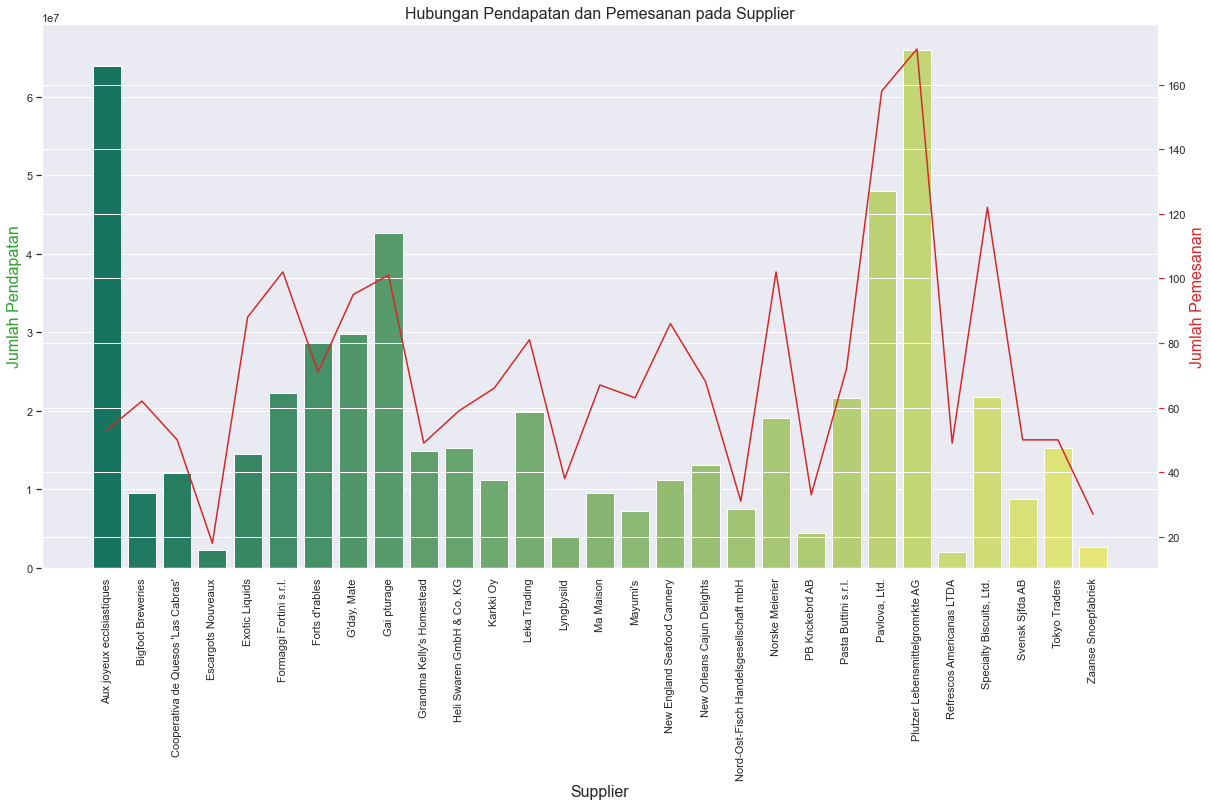

In [33]:
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:green'
ax1.set_title('Hubungan Pendapatan dan Pemesanan pada Supplier', fontsize=16)
ax1 = sns.barplot(x='CompanyName', y='sum', data = dfTabel, palette='summer')
ax1.set_xlabel('Supplier', fontsize=16)
ax1.set_ylabel('Jumlah Pendapatan', fontsize=16, color=color)
ax1.tick_params(axis='x',rotation=90)
ax2 = ax1.twinx()
color = 'tab:red'
ax2 = sns.lineplot(x='CompanyName', y='count', data = dfTabel, sort=False, color=color)
ax2.set_ylabel('Jumlah Pemesanan', fontsize=16, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

Pada bagian ini dibuat grafik untuk melihat secara umum hubungan dari jumlah pendapatan dengan jumlah pemesanan untuk masing - masing supplier. Dalam tabel tersebut didapatkan bahwa sebagian besar supplier yang mendapatkan pendapatan tertinggi memiliki jumlah pesanan tinggi juga. Namun terdapat beberapa supplier yang memiliki pendapatan yang tinggi namun memiliki jumlah pesanan yang rendah yaitu untuk supplier "Aux joyeux ecclsiastiques" dimana memiliki pendapatan tertinggi kedua. Dari grafik ini dapat disimpulkan pemilihan produk yang akan dijual sangat berpengaruh terhadap pendapatan perusahaan, sebaiknya dapat dilakukan diversifikasi produk yang dijual agar dapat mencakup berbagai tingkat ekonomi pelanggan, seperti pelanggan dengan tingkat ekonomi yang rendah hingga yang tinggi. 

### Product dari Supplier yang Terlaris

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


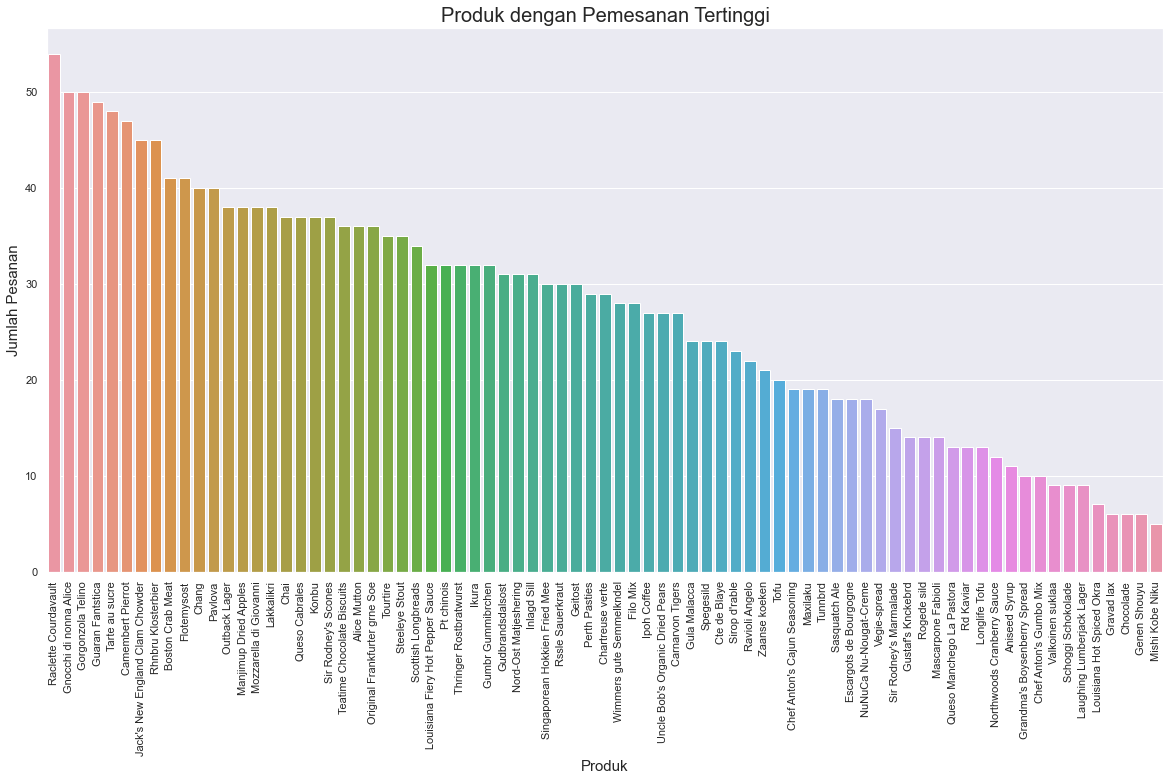

In [34]:
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
sns.countplot(tabel1['ProductName'],order = tabel1['ProductName'].value_counts().index)
plt.xlabel('Produk', size = 15)
plt.ylabel('Jumlah Pesanan', size = 15)
plt.title('Produk dengan Pemesanan Tertinggi', size = 20)
plt.xticks(rotation=90)
plt.show()

In [35]:
tabel1[tabel1['ProductName']=='Raclette Courdavault']

,SupplierID,CompanyName,City,Country,ProductID,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,...,OrderDate,ShippedDate,ShipVia,Freight,ShipCity,ShipCountry,ShipperCompanyName,Discount,ProcessingDay,TotalBuyPrice
1978,28,Gai pturage,Annecy,France,59,Raclette Courdavault,550000,79,0,0,...,1996-07-12,1996-07-15,3,1483300,Genve,Switzerland,Federal Shipping,110000,3,13200000
1979,28,Gai pturage,Annecy,France,59,Raclette Courdavault,550000,79,0,0,...,1996-07-29,1996-08-06,1,2085800,Mnchen,Germany,Speedy Express,110000,8,30800000
1980,28,Gai pturage,Annecy,France,59,Raclette Courdavault,550000,79,0,0,...,1996-08-07,1996-08-09,1,269300,Bergamo,Italy,Speedy Express,110000,2,2640000
1981,28,Gai pturage,Annecy,France,59,Raclette Courdavault,550000,79,0,0,...,1996-08-12,1996-08-16,2,926900,Lule,Sweden,United Package,110000,4,6600000
1982,28,Gai pturage,Annecy,France,59,Raclette Courdavault,550000,79,0,0,...,1996-09-05,1996-09-11,2,1682200,Cork,Ireland,United Package,110000,6,13200000
1983,28,Gai pturage,Annecy,France,59,Raclette Courdavault,550000,79,0,0,...,1996-09-12,1996-09-17,2,637900,Mxico D.F.,Mexico,United Package,110000,5,4400000
1984,28,Gai pturage,Annecy,France,59,Raclette Courdavault,550000,79,0,0,...,1996-10-08,1996-10-10,1,2142700,Boise,USA,Speedy Express,110000,2,17600000
1985,28,Gai pturage,Annecy,France,59,Raclette Courdavault,550000,79,0,0,...,1996-10-14,1996-10-17,3,870300,Lisboa,Portugal,Federal Shipping,110000,3,3960000
1986,28,Gai pturage,Annecy,France,59,Raclette Courdavault,550000,79,0,0,...,1996-10-29,1996-11-05,3,267800,Kobenhavn,Denmark,Federal Shipping,110000,7,3960000
1987,28,Gai pturage,Annecy,France,59,Raclette Courdavault,550000,79,0,0,...,1996-12-18,1996-12-20,2,936300,Stavern,Norway,United Package,110000,2,5280000


Pada grafik diatas didapatkan bahwa produk "Raclette Courdavault" dari france dengan supplier "Gai pturage" memiliki penjualan produk tertinggi namun secara total produk yang terjual jika digabung dengan produk lain yang dijual oleh supplier tersebut, supplier "Gai pturage" hanya dapat menjual produk sebanyak 101 buah produk, masih kalah dengan supplier yang melakukan diversifikasi produk seperti "Plutzer Lebensmittelgromrkte AG" yang mampu mendapatkan pendapatan dan jumlah pemesanan produk tertinggi.

### Supplier dengan Pemberian Diskon Tertinggi

In [36]:
# Add New Column (Discount Presentation)

tabel1['DiscountPresentation'] = (tabel1['Discount']/tabel1['BuyPrice'])*100
tabel1.head()

,SupplierID,CompanyName,City,Country,ProductID,ProductName,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,...,ShippedDate,ShipVia,Freight,ShipCity,ShipCountry,ShipperCompanyName,Discount,ProcessingDay,TotalBuyPrice,DiscountPresentation
0,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,1996-08-26,2,768300,Cunewalde,Germany,United Package,36000,6,6480000,25.0
1,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,1996-09-05,2,1472600,Albuquerque,USA,United Package,36000,6,2592000,25.0
2,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,1996-10-10,1,126900,Portland,USA,Speedy Express,36000,10,2880000,25.0
3,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,1996-11-15,2,7800,Stuttgart,Germany,United Package,36000,8,2160000,25.0
4,1,Exotic Liquids,London,UK,1,Chai,180000,39,0,10,...,1996-11-20,3,538000,Mxico D.F.,Mexico,Federal Shipping,36000,6,1728000,25.0


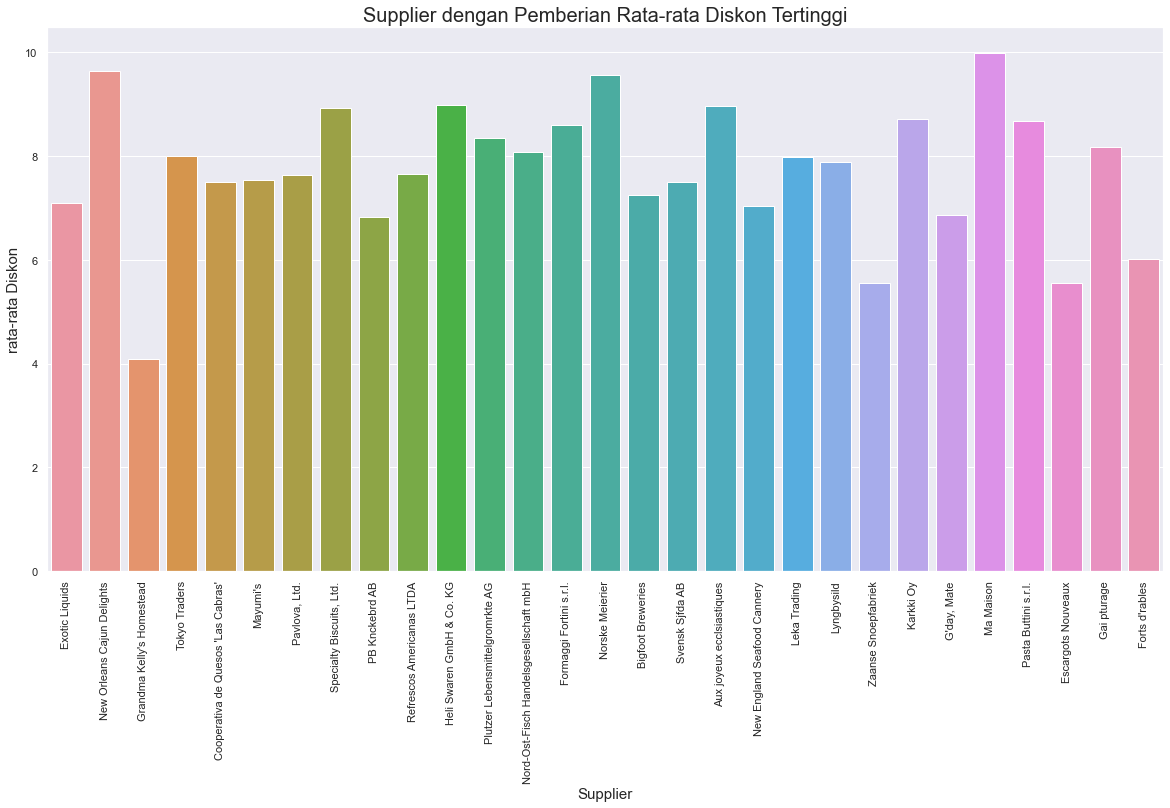

In [40]:
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
sns.barplot(data=tabel1, x="CompanyName", y="DiscountPresentation", estimator=np.mean, ci=None)
plt.xlabel('Supplier', size = 15)
plt.ylabel('rata-rata Diskon', size = 15)
plt.title('Supplier dengan Pemberian Rata-rata Diskon Tertinggi', size = 20)
plt.xticks(rotation=90)
plt.show()

Pada bagian ini dapat dilihat dalam grafik bahwa salah satu yang membuat supplier "Plutzer Lebensmittelgromrkte AG" atau "Aux joyeux ecclsiastiques" memiliki tingkat pendapatan dan penjualan tertinggi dikarenakan rata-rata diskon yang diberikan untuk produk yang dijualnya berkisar lebih dari 8%. Hal tersebut menjadi salah satu cara untuk menarik banyak pelanggan untuk membeli produk supplier tersebut.

### Hubungan Pemesanan dan Pemberian Diskon

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


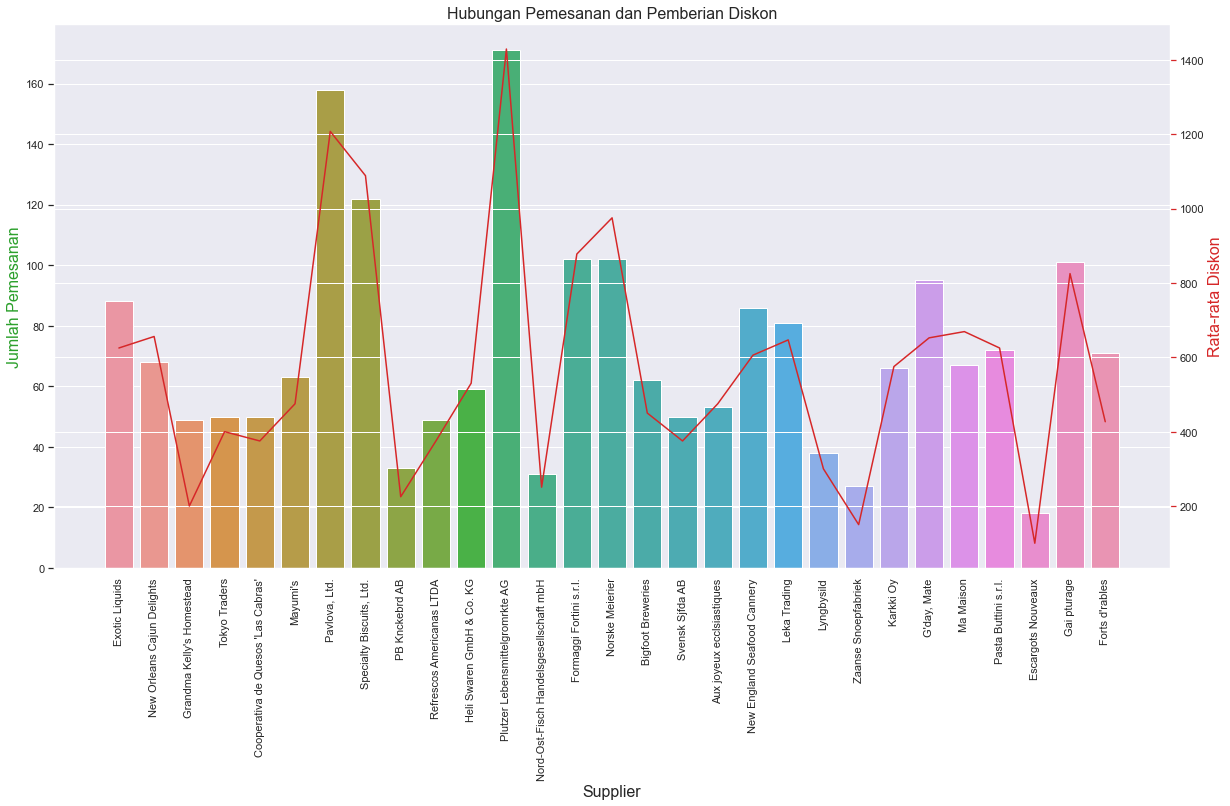

In [45]:
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:green'
ax1.set_title('Hubungan Pemesanan dan Pemberian Diskon', fontsize=16)
ax1 = sns.countplot(tabel1['CompanyName'])
ax1.set_xlabel('Supplier', fontsize=16)
ax1.set_ylabel('Jumlah Pemesanan', fontsize=16, color=color)
ax1.tick_params(axis='x',rotation=90)
ax2 = ax1.twinx()
color = 'tab:red'
ax2 = sns.lineplot(data=tabel1, x='CompanyName', y='DiscountPresentation', estimator=np.sum, color=color, ci=None)
ax2.set_ylabel('Rata-rata Diskon', fontsize=16, color=color)
ax2.tick_params(axis='y', color=color)
plt.show()

Pada grafik hubungan antara jumlah pemesanan dan rata-rata diskon dapat dilihat bahwa rata - rata supplier yang memberikan rata-rata diskon yang tinggi memiliki jumlah pemesanan yang tinggi pula. Hal tersebut terlihat bahwa pemberian diskon berbanding lurus dengan jumlah pemesanan pelanggan. Hal tersebut dapat menjadi masukan untuk perusahaan agar dapat memberikan diskon yang menarik agar pelanggan mau membeli produk kita dan melakukan pembelian kembali kepada perusahaan kita. Setelah tingkat loyalitas pelanggan terhadap produk tersebut terbentuk, barulah pemberian diskon tersebut perlahan diturunkan agar dapat meningkatkan profit.

### Presentase Diskon pada Setiap Produk terhadap Harga Produk

Pada bagian ini akan dilakukan pengujian hipotesis apakah presentase diskon antara diskon terhadap harga produk untuk masing-masing produk memiliki besaran yang sama atau memiliki besaran yang berbeda untuk setiap produknya. Presentase digunakan karena harga dari masing-masing produk bervariasi sehingga sangat penting untuk mengetahui besaran median dari presentase diskon yang dapat diberikan agar perusahaan dapat bersaing dengan supplier lain.

In [46]:
# Uji Perbandingan Nilai Presentase Diskon untuk Setiap Product (Uji Normalitas)

from scipy.stats import shapiro

norm, pval = shapiro(tabel1['DiscountPresentation'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 0.05)')
    print ('DATA TIDAK BERDISTRIBUSI NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 0.05)')
    print ('DATA BERDISTRIBUSI NORMAL')

Tolak H0 Karena P-Value (0.0 < 0.05)
DATA TIDAK BERDISTRIBUSI NORMAL


Pada tahapan uji normalitas kali ini digunakan metode uji normalitas "shapiro wilk test" yang menghasilkan data tidak terdistribusi normal dengan pval < 0.05, oleh karena itu selanjutnya akan dilakukan uji perbandingan dan uji korelasi menggunakan uji non parametrik.

In [49]:
# Uji Perbandingan Nilai Presentase Diskon untuk 10 Supplier dengan Pemesanan Tertinggi

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    tabel1[tabel1['CompanyName'] == 'Plutzer Lebensmittelgromrkte AG']['DiscountPresentation'],
    tabel1[tabel1['CompanyName'] == 'Pavlova, Ltd.']['DiscountPresentation'],
    tabel1[tabel1['CompanyName'] == 'Specialty Biscuits, Ltd.']['DiscountPresentation'],
    tabel1[tabel1['CompanyName'] == 'Formaggi Fortini s.r.l.']['DiscountPresentation'],
    tabel1[tabel1['CompanyName'] == 'Norske Meierier']['DiscountPresentation'],
    tabel1[tabel1['CompanyName'] == 'Gai pturage']['DiscountPresentation'],
    tabel1[tabel1['CompanyName'] == "G'day, Mate"]['DiscountPresentation'],
    tabel1[tabel1['CompanyName'] == "Exotic Liquids"]['DiscountPresentation'],
    tabel1[tabel1['CompanyName'] == 'New England Seafood Cannery']['DiscountPresentation'],
    tabel1[tabel1['CompanyName'] == 'Leka Trading']['DiscountPresentation']
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pvalkrus} < 0.05)')
    print ('Terdapat Perbedaan Nilai Median Presentase diskon terhadap harga produk pada 10 supplier dengan pendapatan tertinggi')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pvalkrus} > 0.05)')
    print ('Tidak Terdapat Perbedaan Nilai Median Presentase diskon terhadap harga produk pada 10 supplier dengan pendapatan tertinggi')

Gagal Tolak H0 Karena P-Value (0.888489175606558 > 0.05)
Tidak Terdapat Perbedaan Nilai Median Presentase diskon terhadap harga produk pada 10 supplier dengan pendapatan tertinggi


Pada bagian uji perbandingan kali ini, dikarenakan hasil uji normalitas data menunjukkan data tidak terdistribusi normal dan parameter yang akan diuji memiliki lebih dari 2 kelompok yaitu untuk 10 supplier tertinggi, maka uji perbandingan menggunakan metode Kruskal-Wallis Test yang menghasilkan pvalue lebih dari 0.05 maka kesimpulannya yaitu gagal tolak H0 yang artinya tidak terdapat perbedaan Nilai Median dari Presentase diskon terhadap harga produk pada 10 supplier dengan pendapatan tertinggi. Angka presentase ini seharusnya dapat dijadikan acuan bagi perusahaan dalam memberikan promo diskon produk kepada pelanggan agar dapat bersaing dengan supplier-supplier dengan jumlah pemesanan produk yang tinggi dari pelanggan.

### Hubungan Waktu Respon dan Diskon dengan Jumlah Pendapatan

In [60]:
#Create DataColumn for Correlation Test

tabelCorr = tabel1.groupby('CompanyName')['DiscountPresentation'].agg(['mean','count']).reset_index()
tabelCorr2 = tabel1.groupby('CompanyName')['ProcessingDay'].agg(['mean']).reset_index()
tabelCorr = tabelCorr.rename(columns={"mean":"RataRata_Diskon","count":"Jumlah_Pemesanan"})
tabelCorr2 = tabelCorr2.rename(columns={"mean":"RataRata_ProcessingDay"})
tabelResult = pd.merge(tabelCorr, tabelCorr2, on="CompanyName")
tabelResult

,CompanyName,RataRata_Diskon,Jumlah_Pemesanan,RataRata_ProcessingDay
0,Aux joyeux ecclsiastiques,8.962264,53,9.509434
1,Bigfoot Breweries,7.258065,62,8.112903
2,Cooperativa de Quesos 'Las Cabras',7.500000,50,8.680000
3,Escargots Nouveaux,5.555556,18,6.333333
4,Exotic Liquids,7.102273,88,7.636364
5,Formaggi Fortini s.r.l.,8.604881,102,7.647059
6,Forts d'rables,6.010939,71,8.309859
7,"G'day, Mate",6.866211,95,7.884211
8,Gai pturage,8.168317,101,7.950495
9,Grandma Kelly's Homestead,4.081633,49,7.551020


In [61]:
tabelResult[['RataRata_Diskon', 'Jumlah_Pemesanan', 'RataRata_ProcessingDay']].corr('spearman')

,RataRata_Diskon,Jumlah_Pemesanan,RataRata_ProcessingDay
RataRata_Diskon,1.000000,0.380178,0.470559
Jumlah_Pemesanan,0.380178,1.000000,0.396599
RataRata_ProcessingDay,0.470559,0.396599,1.000000


<AxesSubplot:>

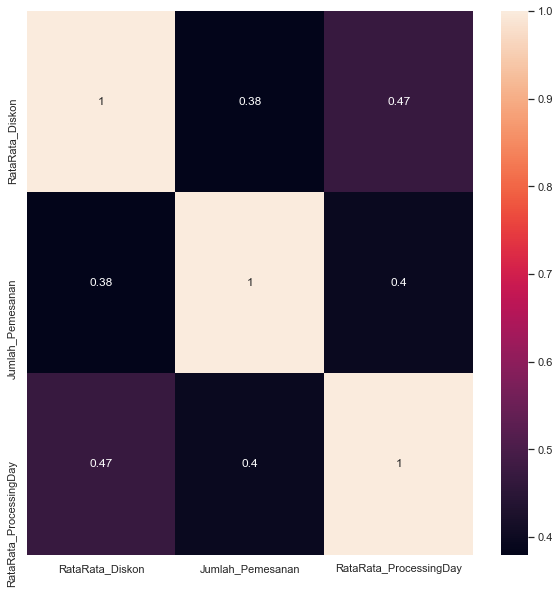

In [62]:
# Korelasi

plt.figure(figsize=(10,10))
sns.heatmap(tabelResult[['RataRata_Diskon', 'Jumlah_Pemesanan', 'RataRata_ProcessingDay']].corr('spearman'), annot=True)

Dalam uji korelasi ini menggunakan metode spearman dikarenakan data yang digunakan tidak terdistribusi normal. Hasil uji korelasi spearman menunjukkan hubungan korelasi tertinggi untuk parameter ```Jumlah_Pemesanan``` yaitu ```RataRata_ProcessingDay``` baru setelah itu ```RataRata_Discount``` yang artinya waktu respon supplier dalam memproses pesanan pelanggan jadi salah satu penentu pelanggan melakukan pemesanan, baru setelah itu diskon lah yang menjadi pertimbangan untuk pelanggan melakukan pemesanan.

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RataRata_Diskon', ylabel='Jumlah_Pemesanan'>

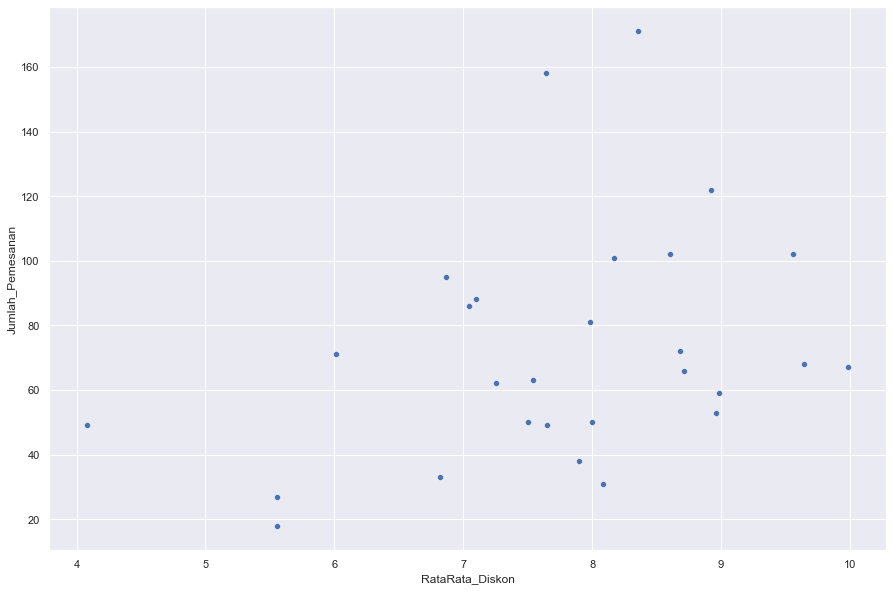

In [64]:
# Korelasi Antara Rata-rata Discount dan Jumlah Pemesanan Pelanggan

plt.figure(figsize=(15,10))
sns.scatterplot(tabelResult['RataRata_Diskon'], tabelResult['Jumlah_Pemesanan'])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RataRata_ProcessingDay', ylabel='Jumlah_Pemesanan'>

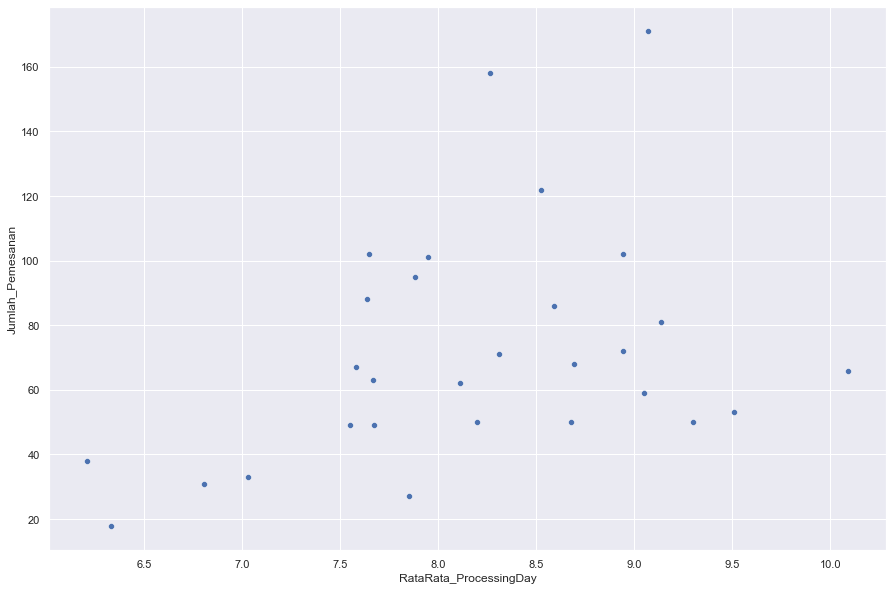

In [65]:
# Korelasi Antara Rata-rata ProcessingDay dan Jumlah Pemesanan Pelanggan

plt.figure(figsize=(15,10))
sns.scatterplot(tabelResult['RataRata_ProcessingDay'], tabelResult['Jumlah_Pemesanan'])

Dari grafik scatterplot untuk melihat persebaran data terlihat titik sisi terluar semakin tinggi nilai ```RataRata_ProcessingDay``` atau ```RataRata_Diskon``` semakin tinggi pula jumlah pemesanan dan rentang persebaran nilai menjadi lebih lebar. 

Dari hasil analisis didapatkan kesimpulan bahwa perusahaan dapat meningkatkan waktu respon pemesanan pelanggan dan memberikan banyak diskon dengan nilai diatas nilai diskon rata - rata dari top 10 supplier yang ada untuk meningkatkan jumlah pemesanan pelanggan dan meningkatkan pendapatan perusahaan atas penjualan produk. 